# **Gender Recognition by Voice and Speech Analysis**
In this project I used data analysis techniques, variable selection and machine learning models, in order to create a model capable of detecting gender from frequency data emitted during speech.

# **Dataset summary**
This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of train set and test set where the test set consist of 2851 rows and 22 columns and the test set consist of 317 rowa and 21 columns, collected from male and female speakers.

# **Dictionary of variables**
* meanfreq: mean frequency (in kHz) → sd: standard deviation of frequency

* median: median frequency (in kHz)

* Q25: first quantile (in kHz)

* Q75: third quantile (in kHz)

* IQR: interquantile range (in kHz)

* skew: skewness (see note in specprop description)

* kurt: kurtosis (see note in specprop description)

* sp.ent: spectral entropy

* sfm: spectral flatness

* mode: mode frequency

* centroid: frequency centroid (see specprop)

* peakf: peak frequency (frequency with highest energy)

* meanfun: average of fundamental frequency measured across acoustic signal

* minfun: minimum fundamental frequency measured across acoustic signal

* maxfun: maximum fundamental frequency measured across acoustic signal

* meandom: average of dominant frequency measured across acoustic signal

* mindom: minimum of dominant frequency measured across acoustic signal

* maxdom: maximum of dominant frequency measured across acoustic signal

* dfrange: range of dominant frequency measured across acoustic signal

* modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range

* label: The label for the voice sample (male or female)




In [3]:
import numpy as np
import pandas as pd
from io import StringIO
from google.colab import files 
import io
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  f1_score

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support, accuracy_score, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve, cross_val_score
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.feature_selection import mutual_info_regression, RFE

kfold = KFold(n_splits=5)

In [4]:
uploaded = files.upload()


Saving voice_test.csv to voice_test.csv
Saving voice_train.csv to voice_train.csv


In [66]:
test = pd.read_csv('voice_test.csv')
train = pd.read_csv('voice_train.csv')
test

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,...,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,2148,0.186833,0.027472,0.184325,0.173955,0.204731,0.030777,2.655225,10.565846,0.821812,...,0.180645,0.186833,0.172790,0.023495,0.271186,0.178571,0.007812,0.226562,0.218750,0.108929
1,1124,0.188879,0.060316,0.195537,0.138072,0.242975,0.104904,1.497393,5.037085,0.909425,...,0.140386,0.188879,0.133092,0.050847,0.272727,0.855938,0.023438,8.718750,8.695312,0.098712
2,170,0.150705,0.087127,0.174299,0.069666,0.226082,0.156416,2.603951,22.328899,0.969287,...,0.050181,0.150705,0.109992,0.017260,0.266667,1.240954,0.007812,5.562500,5.554688,0.332396
3,3158,0.183667,0.040607,0.182534,0.156480,0.207646,0.051166,2.054138,7.483019,0.898138,...,0.177040,0.183667,0.149237,0.018648,0.262295,0.550312,0.007812,3.421875,3.414062,0.166503
4,2229,0.205159,0.039543,0.210805,0.186667,0.228908,0.042241,2.099683,7.562209,0.876002,...,0.224885,0.205159,0.154736,0.047105,0.277457,1.578835,0.187500,10.804688,10.617188,0.113644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,3085,0.161414,0.058721,0.168799,0.155354,0.187696,0.032343,6.983165,62.015963,0.883244,...,0.168799,0.161414,0.152409,0.018282,0.172414,0.187800,0.034180,0.683594,0.649414,0.062857
313,1632,0.196856,0.062991,0.214238,0.193520,0.229305,0.035785,3.540719,19.561051,0.894763,...,0.217691,0.196856,0.163254,0.016327,0.275862,0.419398,0.007812,5.289062,5.281250,0.087395
314,2893,0.208788,0.039871,0.200610,0.188232,0.239878,0.051646,2.429290,10.293602,0.860193,...,0.195061,0.208788,0.170176,0.047666,0.279070,1.677455,0.023438,7.125000,7.101562,0.173157
315,1106,0.185915,0.060364,0.197474,0.132632,0.237632,0.105000,0.905155,3.204754,0.934194,...,0.226579,0.185915,0.129221,0.046967,0.277457,1.024816,0.023438,5.320312,5.296875,0.154559


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        317 non-null    int64  
 1   meanfreq  317 non-null    float64
 2   sd        317 non-null    float64
 3   median    317 non-null    float64
 4   Q25       317 non-null    float64
 5   Q75       317 non-null    float64
 6   IQR       317 non-null    float64
 7   skew      317 non-null    float64
 8   kurt      317 non-null    float64
 9   sp.ent    317 non-null    float64
 10  sfm       317 non-null    float64
 11  mode      317 non-null    float64
 12  centroid  317 non-null    float64
 13  meanfun   317 non-null    float64
 14  minfun    317 non-null    float64
 15  maxfun    317 non-null    float64
 16  meandom   317 non-null    float64
 17  mindom    317 non-null    float64
 18  maxdom    317 non-null    float64
 19  dfrange   317 non-null    float64
 20  modindx   317 non-null    float6

In [8]:
train.describe()

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,...,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,...,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000
mean,1591.565416,0.180923,0.057143,0.185722,0.140349,0.224730,0.084381,3.118469,35.808329,0.895312,...,0.165481,0.180923,0.142891,0.036834,0.258968,0.833608,0.052634,5.075745,5.023111,0.173933
std,909.939169,0.029796,0.016588,0.036175,0.048628,0.023509,0.042728,4.163727,131.430900,0.044795,...,0.076918,0.029796,0.032191,0.019182,0.029806,0.525565,0.062982,3.526201,3.525193,0.119463
min,1.000000,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,...,0.000000,0.039363,0.055565,0.009775,0.108696,0.007812,0.004883,0.007812,0.000000,0.000000
25%,808.500000,0.163739,0.042082,0.169726,0.111139,0.208756,0.042663,1.638410,5.604497,0.862190,...,0.118100,0.163739,0.117578,0.018223,0.253968,0.423799,0.007812,2.207031,2.183594,0.099591
50%,1590.000000,0.184848,0.059151,0.190067,0.140229,0.225729,0.094235,2.183320,8.255809,0.901840,...,0.186667,0.184848,0.140678,0.046921,0.271186,0.767578,0.023438,4.992188,4.968750,0.139159
75%,2382.500000,0.199061,0.066891,0.210650,0.175690,0.243700,0.114208,2.932962,13.649354,0.928727,...,0.221341,0.199061,0.169593,0.047904,0.277457,1.180411,0.070312,7.078125,7.042969,0.209525
max,3167.000000,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,...,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        2851 non-null   int64  
 1   meanfreq  2851 non-null   float64
 2   sd        2851 non-null   float64
 3   median    2851 non-null   float64
 4   Q25       2851 non-null   float64
 5   Q75       2851 non-null   float64
 6   IQR       2851 non-null   float64
 7   skew      2851 non-null   float64
 8   kurt      2851 non-null   float64
 9   sp.ent    2851 non-null   float64
 10  sfm       2851 non-null   float64
 11  mode      2851 non-null   float64
 12  centroid  2851 non-null   float64
 13  meanfun   2851 non-null   float64
 14  minfun    2851 non-null   float64
 15  maxfun    2851 non-null   float64
 16  meandom   2851 non-null   float64
 17  mindom    2851 non-null   float64
 18  maxdom    2851 non-null   float64
 19  dfrange   2851 non-null   float64
 20  modindx   2851 non-null   floa

In [30]:
# Checking for duplicate rows
duplicateRows = train[train.duplicated()]
duplicateRows


,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label


In [12]:
# Checking for missing values 
train.isnull().sum()

Id          0
meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [31]:
label = train['label']
label

0       1
1       0
2       1
3       1
4       0
       ..
2846    0
2847    1
2848    1
2849    1
2850    1
Name: label, Length: 2851, dtype: int64

In [12]:
train.groupby('label').size()

label
female    1432
male      1419
dtype: int64

In [82]:
# Encoding the label(male and female) to 1 and 0 using label encoder
label_encoder = LabelEncoder()
train['label'] = label_encoder.fit_transform(train['label'])
train

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,765,0.162337,0.058206,0.174065,0.100225,0.196512,0.096287,2.127226,7.815129,0.921533,...,0.162337,0.095852,0.016754,0.235294,0.406033,0.046875,3.484375,3.437500,0.155348,1
1,3071,0.161653,0.057435,0.170138,0.157522,0.182929,0.025407,6.968850,60.968047,0.870409,...,0.161653,0.163486,0.015601,0.204082,0.595161,0.170898,3.979492,3.808594,0.209073,0
2,1546,0.165290,0.061891,0.135071,0.118468,0.225176,0.106708,2.631865,12.629116,0.918897,...,0.165290,0.120050,0.035088,0.222222,0.458577,0.087891,1.015625,0.927734,0.459834,1
3,410,0.188100,0.055735,0.206028,0.130493,0.229470,0.098977,1.538406,5.145753,0.914325,...,0.188100,0.108470,0.021305,0.145455,0.493229,0.125000,4.734375,4.609375,0.105202,1
4,2689,0.187497,0.044226,0.190071,0.156800,0.215435,0.058635,1.653083,5.839465,0.907477,...,0.187497,0.154529,0.048338,0.279070,1.113502,0.023438,8.765625,8.742188,0.103095,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,3092,0.166738,0.052677,0.169427,0.162650,0.189223,0.026573,7.550412,76.134526,0.865282,...,0.166738,0.152651,0.022727,0.208333,0.174154,0.161133,0.214844,0.053711,0.136364,0
2847,1095,0.198718,0.058959,0.217333,0.143111,0.252000,0.108889,1.116666,3.569725,0.917123,...,0.198718,0.139322,0.050473,0.279070,0.792092,0.023438,4.968750,4.945312,0.155766,1
2848,1130,0.202333,0.063001,0.221946,0.137544,0.264817,0.127273,2.000371,6.681799,0.873847,...,0.202333,0.123610,0.047291,0.269663,1.190168,0.023438,7.429688,7.406250,0.093438,1
2849,1294,0.181799,0.058102,0.192037,0.123670,0.225568,0.101897,1.091660,4.009295,0.925575,...,0.181799,0.110586,0.049741,0.274286,0.789062,0.023438,4.359375,4.335938,0.062312,1


In [83]:
label_encoder.classes_

array(['female', 'male'], dtype=object)

In [87]:

label_end = list(enumerate(label_encoder.classes_))
#label_key_list = list(label_end.keys())
#type(label_end.keys)
#label_key = " "
#label_key = ', '.join(key for key in label_end)
#print(type(label_key))
#type(label_end.keys)

In [46]:
train['label'].values

array([1, 0, 1, ..., 1, 1, 1])

In [53]:
#d = test.query("'Id' == @train.Id.values")
#d =test.query("Id in @train.Id.values")

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,...,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx


In [16]:
#  Visualizing the genres of the extreme frequencies
train.query('meanfreq == 0.2511237587 | meanfreq == 0.03936334258')

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
1178,2359,0.251124,0.034210,0.261224,0.247347,0.273469,0.026122,3.102230,13.091336,0.780359,...,0.251124,0.185008,0.047809,0.279070,1.891544,0.046875,9.890625,9.843750,0.081256,0
1649,454,0.039363,0.060447,0.013588,0.005581,0.042946,0.037366,4.593055,27.934091,0.817450,...,0.039363,0.101011,0.016048,0.246154,0.256104,0.007812,3.242188,3.234375,0.139629,1


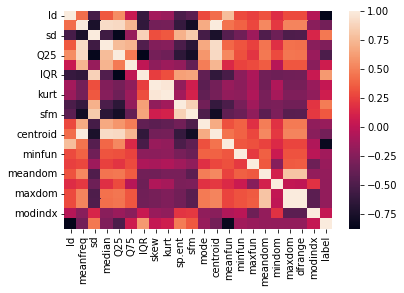

In [17]:
# Using Seaborn to plot the correlation graph between the variables 
matrix = train.corr()
sns.heatmap(matrix)


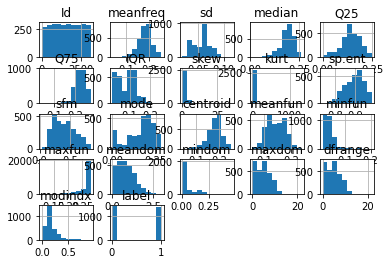

In [18]:
# Univariate Histogram to check frequency distributions 
#fig, axs = plt.subplots(1, 1,figsize =(10, 7),tight_layout = True)
train.hist()
plt.show()

In [19]:
train.head()

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,765,0.162337,0.058206,0.174065,0.100225,0.196512,0.096287,2.127226,7.815129,0.921533,...,0.162337,0.095852,0.016754,0.235294,0.406033,0.046875,3.484375,3.437500,0.155348,1
1,3071,0.161653,0.057435,0.170138,0.157522,0.182929,0.025407,6.968850,60.968047,0.870409,...,0.161653,0.163486,0.015601,0.204082,0.595161,0.170898,3.979492,3.808594,0.209073,0
2,1546,0.165290,0.061891,0.135071,0.118468,0.225176,0.106708,2.631865,12.629116,0.918897,...,0.165290,0.120050,0.035088,0.222222,0.458577,0.087891,1.015625,0.927734,0.459834,1
3,410,0.188100,0.055735,0.206028,0.130493,0.229470,0.098977,1.538406,5.145753,0.914325,...,0.188100,0.108470,0.021305,0.145455,0.493229,0.125000,4.734375,4.609375,0.105202,1
4,2689,0.187497,0.044226,0.190071,0.156800,0.215435,0.058635,1.653083,5.839465,0.907477,...,0.187497,0.154529,0.048338,0.279070,1.113502,0.023438,8.765625,8.742188,0.103095,0


In [20]:
#sns.distplot(train, hist=False)
#plt.show()

In [21]:
train.shape

(2851, 22)

In [22]:
test.shape

(317, 21)

In [100]:
#Normalizing the data
# Seperating the array into input and output components
x = train.values[:,0:20]
y = train.values[:,20]

#Generating the normalized data
scaler = Normalizer().fit(x)
x = scaler.transform(x)
print(x)

[[9.99922257e-01 2.12188434e-04 7.60808605e-05 ... 6.12697462e-05
  4.55438447e-03 4.49311472e-03]
 [9.99798725e-01 5.26278794e-05 1.86985265e-05 ... 5.56379160e-05
  1.29556862e-03 1.23993070e-03]
 [9.99964484e-01 1.06911093e-04 4.00316077e-05 ... 5.68483205e-05
  6.56913926e-04 6.00065605e-04]
 ...
 [9.99936824e-01 1.79044419e-04 5.57494722e-05 ... 2.07398401e-05
  6.57452931e-03 6.55378947e-03]
 [9.99982967e-01 1.40491415e-04 4.49003729e-05 ... 1.81121335e-05
  3.36885684e-03 3.35074470e-03]
 [9.99942639e-01 1.95025724e-04 7.70011441e-05 ... 2.72513437e-05
  7.00359534e-03 6.97634399e-03]]


In [128]:
voice_norm = pd.DataFrame({'meanfreq': x[:, 0], 'sd': x[:, 1], 'median': x[:, 2], 'Q25': x[:, 3], 'Q75': x[:, 4], 
                          'IQR': x[:, 5], 'skew': x[:, 6], 'kurt': x[:, 7], 'sp.ent': x[:, 8], 'sfm': x[:, 9], 
                          'mode': x[:, 10], 'centroid': x[:, 11], 'meanfun':  x[:, 12], 'minfun': x[:, 13], 'maxfun':
                          x[:, 14], 'meandom': x[:, 15], 'mindom': x[:, 16], 'maxdom': x[:, 17], 'dfrange': x[:, 18]
                          ,'modindx': x[:, 19]})

voice_norm.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.999922,0.000212,0.000076,0.000228,0.000131,0.000257,0.000126,0.002780,0.010215,0.001205,0.000558,0.000255,0.000212,0.000125,0.000022,0.000308,0.000531,0.000061,0.004554,0.004493
1,0.999799,0.000053,0.000019,0.000055,0.000051,0.000060,0.000008,0.002269,0.019849,0.000283,0.000150,0.000056,0.000053,0.000053,0.000005,0.000066,0.000194,0.000056,0.001296,0.001240
2,0.999964,0.000107,0.000040,0.000087,0.000077,0.000146,0.000069,0.001702,0.008169,0.000594,0.000268,0.000084,0.000107,0.000078,0.000023,0.000144,0.000297,0.000057,0.000657,0.000600
3,0.999780,0.000459,0.000136,0.000502,0.000318,0.000560,0.000241,0.003751,0.012548,0.002230,0.000972,0.000543,0.000459,0.000265,0.000052,0.000355,0.001203,0.000305,0.011545,0.011240
4,0.999987,0.000070,0.000016,0.000071,0.000058,0.000080,0.000022,0.000615,0.002172,0.000337,0.000126,0.000073,0.000070,0.000057,0.000018,0.000104,0.000414,0.000009,0.003260,0.003251


In [129]:
voice_norm['label'] = train['label']

In [26]:
train.tail(10)

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
2841,330,0.154637,0.060654,0.164264,0.100706,0.202485,0.101779,3.455839,16.283380,0.895792,...,0.154637,0.102158,0.084034,0.181818,0.413876,0.097656,0.610352,0.512695,0.633584,1
2842,1238,0.176361,0.055299,0.164200,0.127990,0.229449,0.101460,1.362280,4.282859,0.916700,...,0.176361,0.141236,0.047059,0.277457,1.374566,0.023438,5.250000,5.226562,0.116872,1
2843,466,0.183967,0.047837,0.186222,0.144172,0.223933,0.079762,1.620491,5.719073,0.904728,...,0.183967,0.108979,0.019277,0.275862,0.620605,0.140625,4.679688,4.539062,0.029506,1
2844,2169,0.192038,0.032999,0.192881,0.178182,0.206504,0.028323,2.748778,10.569015,0.825689,...,0.192038,0.188745,0.087432,0.242424,1.032895,0.171875,6.609375,6.437500,0.275148,0
2845,1638,0.193981,0.052240,0.205425,0.173170,0.225327,0.052157,1.846474,6.146623,0.910068,...,0.193981,0.182574,0.021025,0.275862,0.291667,0.007812,2.070312,2.062500,0.116908,0
2846,3092,0.166738,0.052677,0.169427,0.162650,0.189223,0.026573,7.550412,76.134526,0.865282,...,0.166738,0.152651,0.022727,0.208333,0.174154,0.161133,0.214844,0.053711,0.136364,0
2847,1095,0.198718,0.058959,0.217333,0.143111,0.252000,0.108889,1.116666,3.569725,0.917123,...,0.198718,0.139322,0.050473,0.279070,0.792092,0.023438,4.968750,4.945312,0.155766,1
2848,1130,0.202333,0.063001,0.221946,0.137544,0.264817,0.127273,2.000371,6.681799,0.873847,...,0.202333,0.123610,0.047291,0.269663,1.190168,0.023438,7.429688,7.406250,0.093438,1
2849,1294,0.181799,0.058102,0.192037,0.123670,0.225568,0.101897,1.091660,4.009295,0.925575,...,0.181799,0.110586,0.049741,0.274286,0.789062,0.023438,4.359375,4.335938,0.062312,1
2850,860,0.167732,0.066225,0.171886,0.112598,0.225196,0.112598,0.822981,3.103282,0.953210,...,0.167732,0.126107,0.048096,0.279070,0.813616,0.023438,6.023438,6.000000,0.123384,1


In [130]:
voice_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  2851 non-null   float64
 1   sd        2851 non-null   float64
 2   median    2851 non-null   float64
 3   Q25       2851 non-null   float64
 4   Q75       2851 non-null   float64
 5   IQR       2851 non-null   float64
 6   skew      2851 non-null   float64
 7   kurt      2851 non-null   float64
 8   sp.ent    2851 non-null   float64
 9   sfm       2851 non-null   float64
 10  mode      2851 non-null   float64
 11  centroid  2851 non-null   float64
 12  meanfun   2851 non-null   float64
 13  minfun    2851 non-null   float64
 14  maxfun    2851 non-null   float64
 15  meandom   2851 non-null   float64
 16  mindom    2851 non-null   float64
 17  maxdom    2851 non-null   float64
 18  dfrange   2851 non-null   float64
 19  modindx   2851 non-null   float64
 20  label     2851 non-null   int6

In [107]:
# Defining key dataset attributes that explain the labels
x_train, x_test, y_train, y_test = train_test_split(voice_norm.drop(['label'], axis = 1), voice_norm['label'],
                                                  test_size = 0.3,  random_state = 0)
x_train.shape, x_test.shape

((1995, 20), (856, 20))

In [29]:
#RandomForestClassfication
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)
y_rf = clf.predict(x_test)


In [54]:
rf_score = accuracy_score(y_test, y_rf)

0.9848130841121495


array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,

In [31]:
f1_score = f1_score(y_test, y_rf)
print("F1 Score:")
print(f1_score)

F1 Score:
0.984936268829664


In [132]:
result_1 = pd.DataFrame(np.random.randint(0,1,size=(317, 1)), columns=list('l'))
result_1 
submission = pd.DataFrame({ 'Id': test.Id.values, 'Label' : result_1.l.values})
submission.to_csv("voice_reg.csv", index=False)

In [59]:
files.download('voice_reg.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>